In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

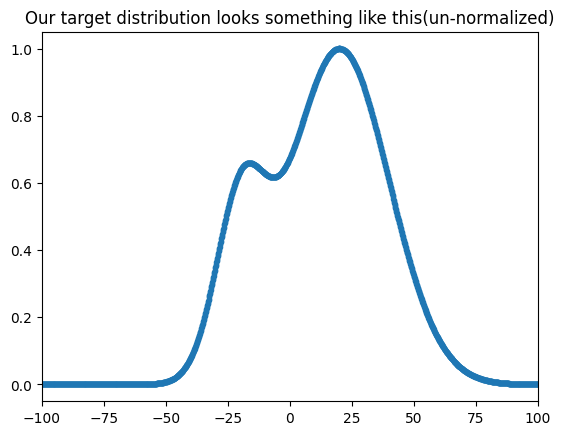

In [48]:
## Define the distribution we want 

rng = np.random.default_rng(seed=69420)

def target_dist(x):
    mu1 = -20.0
    mu2 = 20.0
    sigma1 = 10.0
    sigma2 = 20.0
    return 0.5*np.exp(-((x-mu1)**2)/(2.0*(sigma1**2))) + np.exp(-((x-mu2)**2)/(2.0*(sigma2**2))) 
    


x_arr = np.linspace(-10**4, 10**4, 200000)

plt.scatter(x_arr, target_dist(x_arr), marker=".")
plt.title("Our target distribution looks something like this(un-normalized)")
plt.xlim(-100, 100);



In [49]:
## Using Markov Chain Monte Carlo (Metropolis-Hastings algo) to find the actual target distribution (normalised)

## Sampling funciton for proposal distribution
def proposal_dist(mean):
    std  = 1.0
    ## For our case we use a normal distribution as our proposal 
    return rng.normal(loc=mean, scale=std)

## Functional form of proposal dist
def normal_dist(x, mu):
    sigma = 1.0

    N = 1.0/np.sqrt(2*np.pi)*sigma
    
    return N*np.exp(-((x-mu)**2)/(2.0*(sigma**2)))
    

## Acceptance move
def alpha(x, y):
    Q_factor = normal_dist(x, y)/normal_dist(y, x)
    alpha = target_dist(y)*Q_factor/target_dist(x)
    alpha = np.min([1,alpha])

    return alpha

    



iterations = 10000000
burn_in = 0
data = np.zeros(iterations)

data[0] = proposal_dist(0.0)

iter = 1

while iter < iterations:
    x = data[iter-1]
    y = proposal_dist(x)
    u = rng.uniform(0, 1)
    if u <= alpha(x, y):
        data[iter] = y
    else:
        data[iter] = x

    iter += 1



data



array([  0.61109879,   0.92148555,   2.45196801, ..., -28.34174896,
       -28.45860344, -28.02561761])

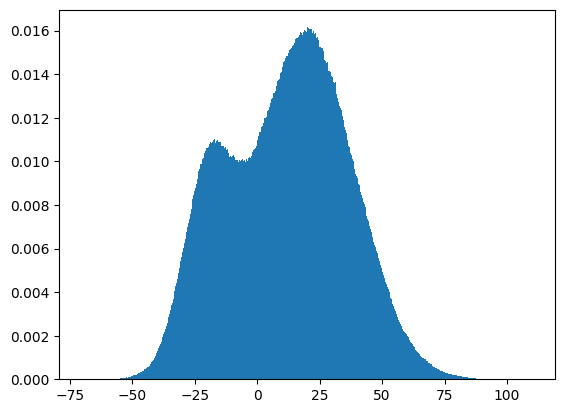

In [50]:
plt.hist(data, bins='fd', density=True);